In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
job_df = pd.read_csv("Job_Placement_Data.csv")

job_df

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


Data Dictionary
* gender : Gender of the candidate
* ssc_percentage : Senior secondary exams percentage (10th Grade)
* ssc_board : Board of education for ssc exams
* hsc_percentage : Higher secondary exams percentage (12th Grade)
* hsc_borad : Board of education for hsc exams
* hsc_subject : Subject of study for hsc
* degree_percentage : Percentage of marks in undergrad degree
* undergrad_degree : Undergrad degree majors
* work_experience : Past work experience
* emp_test_percentage : Aptitude test percentage
* specialization : Postgrad degree majors - (MBA specialization)
* mba_percent : Percentage of marks in MBA degree
* status (TARGET) : Status of placement. Placed / Not Placed

### Data Cleaning

In [3]:
# Are there any missing values?
job_df.isnull().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [5]:
# Check unique values for a couple of columns
cols_to_check = ["ssc_board", "hsc_board", "hsc_subject", "undergrad_degree", "work_experience", "specialisation"]

for col in cols_to_check:
    print(col.upper())
    print(job_df[col].unique(), "\n")

SSC_BOARD
['Others' 'Central'] 

HSC_BOARD
['Others' 'Central'] 

HSC_SUBJECT
['Commerce' 'Science' 'Arts'] 

UNDERGRAD_DEGREE
['Sci&Tech' 'Comm&Mgmt' 'Others'] 

WORK_EXPERIENCE
['No' 'Yes'] 

SPECIALISATION
['Mkt&HR' 'Mkt&Fin'] 



In [6]:
# Check value counts for a couple of columns
cols_to_check = ["ssc_board", "hsc_board", "hsc_subject", "undergrad_degree", "work_experience", "specialisation"]

for col in cols_to_check:
    print(col.upper())
    print(job_df[col].value_counts(), "\n")

SSC_BOARD
Central    116
Others      99
Name: ssc_board, dtype: int64 

HSC_BOARD
Others     131
Central     84
Name: hsc_board, dtype: int64 

HSC_SUBJECT
Commerce    113
Science      91
Arts         11
Name: hsc_subject, dtype: int64 

UNDERGRAD_DEGREE
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: undergrad_degree, dtype: int64 

WORK_EXPERIENCE
No     141
Yes     74
Name: work_experience, dtype: int64 

SPECIALISATION
Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64 



In [8]:
# Look at the people who did arts in hsc and later specialised in marketing
job_df[(job_df["hsc_subject"] == "Arts") & (job_df["specialisation"] == "Mkt&Fin")]

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
2,M,65.0,Central,68.0,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed
19,M,60.0,Others,67.0,Others,Arts,70.00,Comm&Mgmt,Yes,50.48,Mkt&Fin,77.89,Placed
76,F,66.5,Others,70.4,Central,Arts,71.93,Comm&Mgmt,No,61.00,Mkt&Fin,64.27,Placed
122,F,66.5,Central,66.8,Central,Arts,69.30,Comm&Mgmt,Yes,80.40,Mkt&Fin,71.00,Placed
136,F,47.0,Central,59.0,Central,Arts,64.00,Comm&Mgmt,No,78.00,Mkt&Fin,61.58,Not Placed
144,M,52.0,Others,50.0,Others,Arts,61.00,Comm&Mgmt,No,60.00,Mkt&Fin,58.52,Not Placed
148,F,77.0,Central,86.0,Central,Arts,56.00,Others,No,57.00,Mkt&Fin,64.08,Placed
182,M,52.0,Others,65.0,Others,Arts,57.00,Others,Yes,75.00,Mkt&Fin,59.81,Not Placed


### Other undergrad degree analysis

In [10]:
# Look at the people who did arts in hsc and later specialised in marketing
job_others = job_df[(job_df["undergrad_degree"] == "Others")]
job_others

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
34,M,62.0,Others,51.0,Others,Science,52.00,Others,No,68.44,Mkt&HR,62.77,Not Placed
42,M,49.0,Others,39.0,Central,Science,65.00,Others,No,63.00,Mkt&Fin,51.21,Not Placed
49,F,50.0,Others,37.0,Others,Arts,52.00,Others,No,65.00,Mkt&HR,56.11,Not Placed
87,M,59.6,Central,51.0,Central,Science,60.00,Others,No,75.00,Mkt&HR,59.08,Not Placed
124,M,67.0,Central,71.0,Central,Science,64.33,Others,Yes,64.00,Mkt&HR,61.26,Placed
131,F,74.9,Others,57.0,Others,Science,62.00,Others,Yes,80.00,Mkt&Fin,60.78,Placed
148,F,77.0,Central,86.0,Central,Arts,56.00,Others,No,57.00,Mkt&Fin,64.08,Placed
182,M,52.0,Others,65.0,Others,Arts,57.00,Others,Yes,75.00,Mkt&Fin,59.81,Not Placed
185,F,88.0,Central,72.0,Central,Science,78.00,Others,No,82.00,Mkt&HR,71.43,Placed
193,F,60.0,Central,63.0,Central,Arts,56.00,Others,Yes,80.00,Mkt&HR,56.63,Placed


In [11]:
# Specialisation that they did (those that studied other undergrad degree)
job_others["specialisation"].value_counts()

Mkt&HR     7
Mkt&Fin    4
Name: specialisation, dtype: int64

In [12]:
# Where they placed? (those that studied other undergrad degree)
job_others["status"].value_counts()

Not Placed    6
Placed        5
Name: status, dtype: int64

In [16]:
# Where they placed? (those that studied other undergrad degree)
job_others["status"].value_counts(normalize=True)

Not Placed    0.545455
Placed        0.454545
Name: status, dtype: float64

In [13]:
# What highschool subject did they do?
job_others["hsc_subject"].value_counts()

Science     6
Arts        4
Commerce    1
Name: hsc_subject, dtype: int64

In [17]:
job_others["hsc_subject"].value_counts(normalize=True)

Science     0.545455
Arts        0.363636
Commerce    0.090909
Name: hsc_subject, dtype: float64

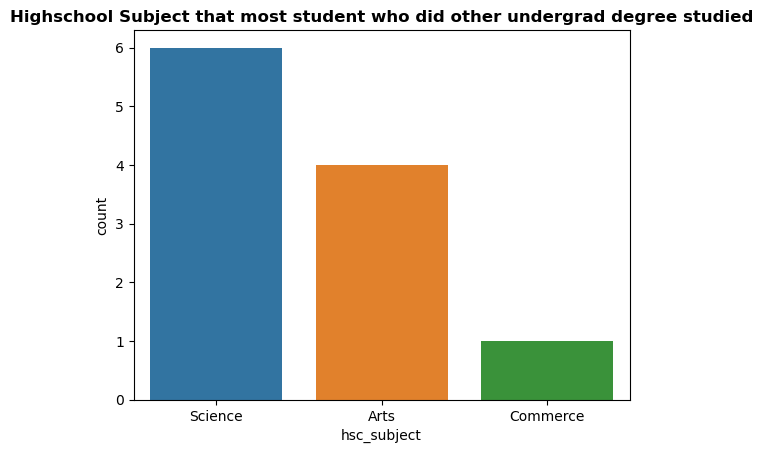

In [15]:
sns.countplot(data=job_others, x="hsc_subject")
plt.title("Highschool Subject that most student who did other undergrad degree studied", fontweight="heavy")
plt.show()

#### Conclusion:
* A total of 11 people did other undergraduate degrees
* 6 people (55%) who studied other undergraduate degrees did Science in highschool while 1 person(0.1%)did Commerce in highschool.
* 6 people (55%) who studied other undergraduate degrees got placed in job while 5 people (45%) did not get placed.

### Specialisation analysis

In [20]:
# How many people did (marketing and hr) and (marketing and finance) 
job_df["specialisation"].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [21]:
# Which specialisation were most people placed
spec_placed = pd.crosstab(job_df["specialisation"], job_df["status"])

spec_placed

status,Not Placed,Placed
specialisation,,
Mkt&Fin,25,95
Mkt&HR,42,53


In [24]:
# Percentage of those who did the different specialisation and whether they got placed or not
perc_spec_placed = spec_placed / len(job_df)
perc_spec_placed

status,Not Placed,Placed
specialisation,,
Mkt&Fin,0.116279,0.441860
Mkt&HR,0.195349,0.246512


In [37]:
# Of those who did get placed, what was their specialisation
job_placed = job_df[job_df["status"] == "Placed"]
job_placed.shape

(148, 13)

In [38]:
job_placed["specialisation"].value_counts()

Mkt&Fin    95
Mkt&HR     53
Name: specialisation, dtype: int64

In [33]:
job_hr = job_df[job_df["specialisation"] == "Mkt&HR"]

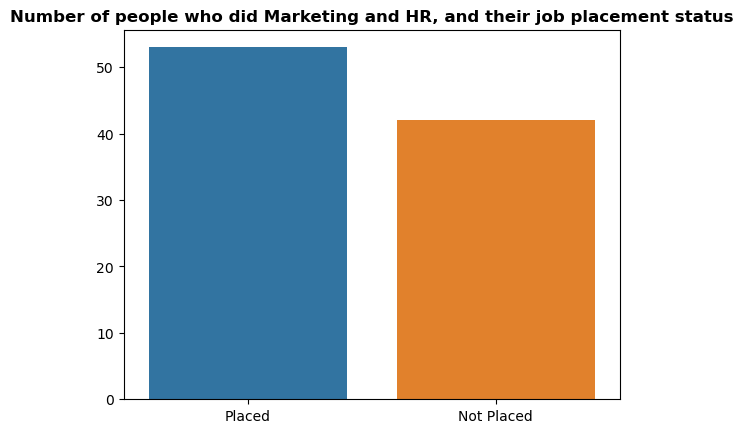

In [34]:
# Value counts
hr_vc = job_hr["status"].value_counts()

# Visualization of their job placement status
sns.barplot(x=hr_vc.index, y=hr_vc.values)
plt.title("Number of people who did Marketing and HR, and their job placement status", fontweight="heavy")
plt.show()

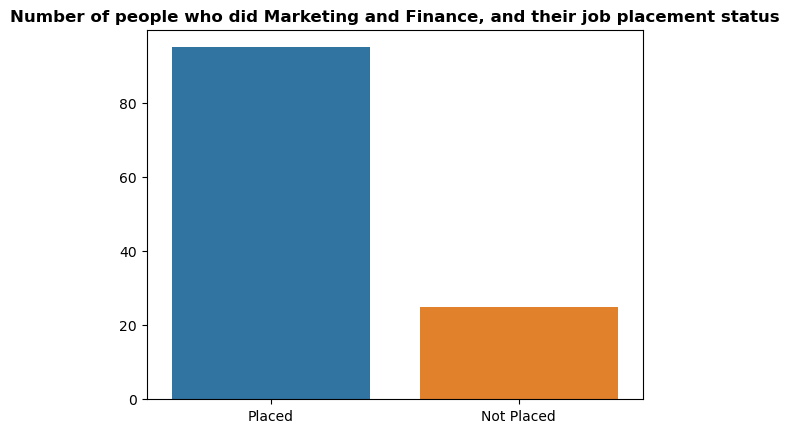

In [35]:
# Visualization of the job placement status of those who did Finance
job_fn = job_df[job_df["specialisation"] == "Mkt&Fin"]

# Value counts
fn_vc = job_fn["status"].value_counts()

# Visualization of their job placement status
sns.barplot(x=fn_vc.index, y=fn_vc.values)
plt.title("Number of people who did Marketing and Finance, and their job placement status", fontweight="heavy")
plt.show()

#### Conclusion:
* 120 people did marketing and finance as their specialisation while 95 people did marketing and hr as theirs.
* Of 148 people who did get job placements, 95 of them did marketing and finance while 53 of them did marketing and hr.
* Of the 120 who did marketing and finance, 95 of them (45%) got job placements.
* Of the 95 who did marketing and HR, 53 of them (25%) got job placements.